# prepare

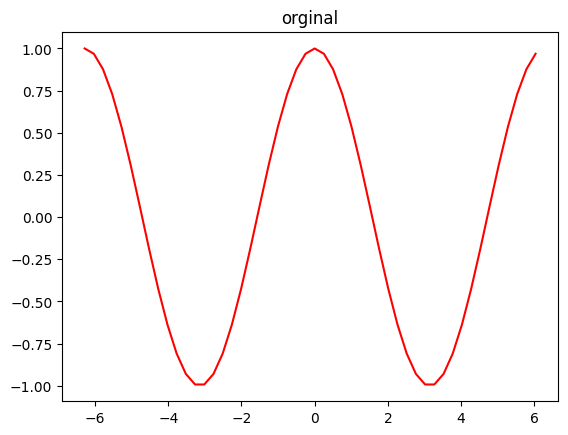

In [21]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np
EPOCH=1500
MLP_LR=0.01
left,right=-2,2
PI=math.pi
NUM=50
# x,y 是普通sinx 的torch tensor
x =torch.tensor([(num * PI)  for num in numpy.arange(left, right,(right-left)/NUM)],dtype=torch.float32)
y = torch.cos(x)
plt.plot(x,y,color='red')
plt.title("orginal")
plt.show()

# mlp

In [23]:
class MLP(torch.nn.Module):
    # constructor
    def __init__(self):
        super().__init__()
        self.layer1=torch.nn.Linear(1,20)
        self.layer2=torch.nn.Linear(20,20)
        self.layer3=torch.nn.Linear(20,1)

    def forward(self,x):
        x=self.layer1(x)
        #激活函数 relu
        #如果不用激活函数，在这种情况下每一层输出都是上层输入的线性函数。容易验证，无论神经网络有多少层，
        #输出都是输入的线性组合，与没有隐藏层效果相当，这种情况就是最原始的感知机（Perceptron）了。因此引入非线性函数作为激活函数
        # 这样深层神经网络就有意义了（不再是输入的线性组合，可以逼近任意函数）。最早的想法是sigmoid函数或者tanh函数，输出有界，很容易充当下一层输入
        x=torch.nn.functional.relu(x)

        x=self.layer2(x)
        x=torch.nn.functional.relu(x)

        x=self.layer3(x)

        return  x

In [42]:
mlp=MLP() #实例化

# input_x和labels是训练网络时候用的输入和标签。
#原始的x和y都是一维的形状为(50,)的torch tensor，表示50个点的数据。然后，通过使用reshape(-1, 1)方法，你将x和y转换成二维形状为(50, 1)的torch tensor。
#这么做的目的主要是使输入数据和标签与神经网络的输入和输出尺寸相匹配。
# 在你的多层感知机（MLP）模型中，第一层是一个线性层，它需要 (batch_size, input_features)的输入形状。
# 将输入数据x重塑为形状 (50, 1)使得它满足MLP模型输入的要求。
input_x=x.reshape(-1, 1)
labels=y.reshape(-1,1)
input_x=input_x
labels=labels
#训练mlp
mlp_optimizer=torch.optim.Adam(mlp.parameters(), lr=MLP_LR)
mlp_loss=[]
Save_LR=[]
for epoch in range(EPOCH):
    preds=mlp(input_x)
    loss=torch.nn.functional.mse_loss(preds,labels)

    mlp_optimizer.zero_grad()
    loss.backward()
    mlp_optimizer.step()
    mlp_loss.append(loss.item())
    Save_LR.append(MLP_LR)

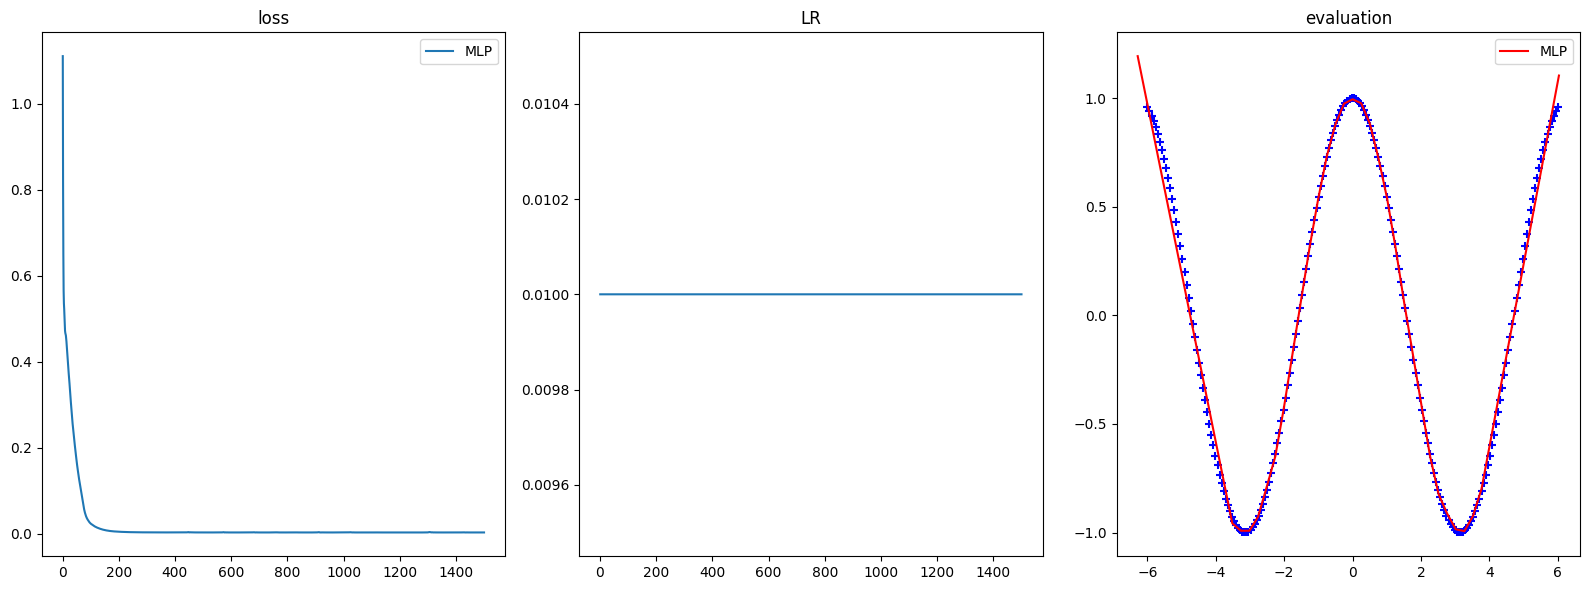

In [50]:
def PlotMLP(mlp,  input_x, x):
    # input_x 是输入网络的x。
    # sin_x 是列表，x的取值，一维数据、
    # 虽然他们的内容（不是维度）是一样的。可以print shape看一下。
    mlp_eval = mlp.eval()
    # mlp_y_np=[]
    # rnn_y_np=[]
    mlp_y = mlp_eval(input_x)
    # for i in range(mlp_y):
    #     mlp_y_np.append(i.detach().numpy())
    # for i in range(rnn_y):
    #     rnn_y_np.append(i.detach().numpy())
    mlp_y_np=mlp_y.cpu().detach().numpy()

    plt.figure(figsize=(16, 6))

    plt.subplot(131)
    plt.plot([i + 1 for i in range(EPOCH)], mlp_loss, label='MLP')
    plt.title('loss')
    plt.legend()



    plt.subplot(132)
    plt.title("LR")
    plt.plot([i + 1 for i in range(EPOCH)],Save_LR)
    plt.tight_layout()

    plt.subplot(133)
    xx=np.linspace(-6,6,200)
    xx=torch.from_numpy(xx).float()
    yy=torch.cos(xx)
    plt.scatter(xx,yy,marker='+',color='blue')

    #plt.plot(x, torch.cos(x), label="original", linewidth=3)
    plt.plot(x, [y[0] for y in mlp_y_np], label='MLP',color='red')
    plt.title('evaluation')
    plt.legend()
    plt.show()
PlotMLP(mlp,input_x,x)